In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab\ Notebooks
%mkdir ./subword

/content/drive/MyDrive/Colab Notebooks
mkdir: cannot create directory ‘./subword’: File exists


# BPE (Bite Pair Encoding)

In [6]:
!pip install subword-nmt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!subword-nmt learn-bpe -s 16000 < ./tokenized_data/train.ja > ./subword/train_ja_code.txt

100% 16000/16000 [00:35<00:00, 444.76it/s]


In [ ]:
!wc -l ./subword/train_ja_code.txt

16001 ./subword/train_ja_code.txt


In [ ]:
!subword-nmt apply-bpe -c ./subword/train_ja_code.txt < ./tokenized_data/train.ja > ./subword/train.ja

In [ ]:
!head -n 10 ./subword/train.ja

せっ@@ しゅう 、 14@@ 20 年 （ 応永 27 年 ） - 1506 年 （ 永 正 3 年 ） ） は 号 で 、 15 世紀 後半 室町 時代 に 活躍 し た 水墨 画家 ・ 禅僧 で 、 画@@ 聖 と も 称え られる 。 
日本 の 水墨 画 を 一変 さ せ た 。 
諱 は 「 等 楊 （ とう よう ） 」 、 もしくは 「 拙 宗 （ せっ@@ しゅう ） 」 と 号 し た 。 
備中 国 に 生まれ 、 京都 ・ 相国寺 に 入っ て から 周防 国 に 移る 。 
その後 遣 明 使 に 随行 し て 中国 （ 明 ） に 渡っ て 中国 の 水墨 画 を 学ん だ 。 
作品 は 数多く 、 中国 風 の 山水 画 だけ で なく 人物 画 や 花鳥 画 も よく し た 。 
大胆 な 構図 と 力@@ 強い 筆 線 は 非常 に 個性 的 な 画風 を 作り出し て いる 。 
現存 する 作品 の うち 6 点 が 国宝 に 指定 さ れ て おり 、 日本 の 画家 の なか でも 別格 の 評価 を 受け て いる と いえる 。 
この ため 、 花鳥 図 屏風 など に 「 伝 雪舟 筆 」 さ れる 作品 は 大変 多い 。 
真@@ 筆 で ある か 専門 家 の 間 で も 意見 の 分かれる もの も 多々 ある 。 


In [ ]:
# !wc -w ./tokenized_data/train.ja
# !wc -w ./subword/train.ja

In [ ]:
!subword-nmt learn-bpe -s 16000 < ./tokenized_data/dev.ja > ./subword/dev_ja_code.txt
!subword-nmt apply-bpe -c ./subword/dev_ja_code.txt < ./tokenized_data/dev.ja > ./subword/dev.ja

!subword-nmt learn-bpe -s 16000 < ./tokenized_data/test.ja > ./subword/test_ja_code.txt
!subword-nmt apply-bpe -c ./subword/test_ja_code.txt < ./tokenized_data/test.ja > ./subword/test.ja

 12% 1979/16000 [00:01<00:10, 1340.21it/s]no pair has frequency >= 2. Stopping
 13% 2072/16000 [00:01<00:11, 1230.42it/s]
 12% 1983/16000 [00:01<00:10, 1341.79it/s]no pair has frequency >= 2. Stopping
 13% 2083/16000 [00:01<00:11, 1235.04it/s]


In [ ]:
!subword-nmt learn-bpe -s 16000 < ./tokenized_data/train.en > ./subword/train_en_code.txt
!subword-nmt apply-bpe -c ./subword/train_en_code.txt < ./tokenized_data/train.en > ./subword/train.en

!subword-nmt learn-bpe -s 16000 < ./tokenized_data/dev.en > ./subword/dev_en_code.txt
!subword-nmt apply-bpe -c ./subword/dev_en_code.txt < ./tokenized_data/dev.en > ./subword/dev.en

!subword-nmt learn-bpe -s 16000 < ./tokenized_data/test.en > ./subword/test_en_code.txt
!subword-nmt apply-bpe -c ./subword/test_en_code.txt < ./tokenized_data/test.en > ./subword/test.en

100% 16000/16000 [00:27<00:00, 574.08it/s]
 22% 3506/16000 [00:02<00:04, 2630.20it/s]no pair has frequency >= 2. Stopping
 25% 3985/16000 [00:02<00:06, 1776.25it/s]
 25% 3971/16000 [00:02<00:03, 3196.99it/s]no pair has frequency >= 2. Stopping
 26% 4156/16000 [00:02<00:06, 1731.94it/s]


# SentencePiece
BPEでは単語分割する必要があるため，日本語や中国語のような単語分割(スペース分割)が難しい言語では正確さに疑問が残る．→SentencePiece

In [7]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 34.1 MB/s 


In [18]:
import sentencepiece as spm
import re

spm.SentencePieceTrainer.Train('--input=kftt-data-1.0/data/orig/kyoto-train.ja --model_prefix=kyoto_ja --vocab_size=16000 --character_coverage=1.0')

sp = spm.SentencePieceProcessor()
sp.Load('kyoto_ja.model')

for src, dst in [
    ('kftt-data-1.0/data/orig/kyoto-train.ja', './subword/train.ja'),
    ('kftt-data-1.0/data/orig/kyoto-dev.ja', './subword/dev.ja'),
    ('kftt-data-1.0/data/orig/kyoto-test.ja', './subword/test.ja'),
]:
    with open(src, 'r') as rf, open(dst, 'w') as wf:
        for x in rf:
            x = x.strip()
            x = re.sub(r'\s+', ' ', x)
            x = sp.encode_as_pieces(x)
            x = ' '.join(x)
            print(x, file=wf)

# 91-94の手順

In [10]:
!git clone https://github.com/pytorch/fairseq
%cd fairseq 
!pip install --editable ./
%cd ..

fatal: destination path 'fairseq' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/fairseq
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/Colab%20Notebooks/fairseq
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 123 kB 14.5 MB/s 
     |████████████████████████████████| 92 kB 13.0 MB/s 
     |████████████████████████████████| 235 kB 68.7 MB/s 
     |████████████████████████████████| 112 kB 63.0 MB/s 
     |████████████████████████████████| 596 kB 52.9 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=3584acb712775d65aae2ee26648b5cede6118e087334355f4e09c1f8c2f54464
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9b

In [11]:
!echo $PYTHONPATH

import os
os.environ['PYTHONPATH'] += ":/content/drive/MyDrive/Colab Notebooks/fairseq/"

!echo $PYTHONPATH

/env/python
/env/python:/content/drive/MyDrive/Colab Notebooks/fairseq/


In [19]:
!fairseq-preprocess \
    --trainpref ./subword/train \
    --validpref ./subword/dev \
    --testpref  ./subword/test \
    --source-lang ja \
    --target-lang en \
    --tokenizer space \
    --workers 20 \
    --thresholdsrc 3\
    --thresholdtgt 3\
    --task translation \
    --destdir result/preprocessing_subword_sp

2022-07-22 03:28:11 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-07-22 03:28:12 | INFO | fairseq_cli.preprocess | Namespace(aim_repo=None, aim_run_hash=None, align_suffix=None, alignfile=None, all_gather_list_size=16384, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, azureml_logging=False, bf16=False, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='result/preprocessing_subword_sp', dict_only=False, empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_file=None, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, on_cpu_convert_precision=False, only_source=False, optimizer=None, padding_factor=8, plasma_path='/tmp

In [20]:
%env CUDA_VISIBLE_DEVICES=0 
!fairseq-train result/preprocessing_subword \
    --fp16 \
    --save-dir result/train_subword \
    --max-epoch 6 \
    --arch transformer \
    --optimizer adam \
    --lr 1e-4 \
    --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy \
    --batch-size 256 \
    --save-interval 6 \
    --tensorboard-logdir log96 \

env: CUDA_VISIBLE_DEVICES=0
2022-07-22 03:31:47 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-07-22 03:31:50 | INFO | fairseq_cli.train | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': 'log96', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile

In [21]:
!pip3 install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 31.0 MB/s 


In [26]:
!fairseq-interactive --path result/train_subword/checkpoint_last.pt result/preprocessing_subword < ./subword/test.ja | grep '^H' | cut -f3 > 95.out

2022-07-22 03:34:34 | INFO | fairseq_cli.interactive | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_na

In [23]:
!fairseq-score \
--sys 95.out \
--ref ./subword/test.en

Namespace(ignore_case=False, order=4, ref='./subword/test.en', sacrebleu=False, sentence_bleu=False, sys='95.out')
BLEU4 = 4.32, 30.6/10.2/2.9/1.2 (BP=0.758, ratio=0.783, syslen=1570, reflen=2005)


In [ ]:
%%bash
for N in `seq 1 5`
do
    fairseq-interactive --path result/train_subword/checkpoint_last.pt --beam $N result/preprocessing_subword < ./subword/test.ja | grep '^H' | cut -f3 > 95_beam$N.out
done

In [25]:
%%bash
for N in `seq 1 5`
do
    fairseq-score --sys 95_beam$N.out --ref ./subword/test.en > 95_beam$N.score
done

Traceback (most recent call last):
  File "/usr/bin/fairseq-score", line 33, in <module>
    sys.exit(load_entry_point('fairseq', 'console_scripts', 'fairseq-score')())
  File "/content/drive/MyDrive/Colab Notebooks/fairseq/fairseq_cli/score.py", line 98, in cli_main
    score(f)
  File "/content/drive/MyDrive/Colab Notebooks/fairseq/fairseq_cli/score.py", line 92, in score
    print(scorer.result_string(args.order))
  File "/content/drive/MyDrive/Colab Notebooks/fairseq/fairseq/scoring/bleu.py", line 162, in result_string
    self.score(order=order),
  File "/content/drive/MyDrive/Colab Notebooks/fairseq/fairseq/scoring/bleu.py", line 136, in score
    return self.brevity() * math.exp(psum / order) * 100
  File "/content/drive/MyDrive/Colab Notebooks/fairseq/fairseq/scoring/bleu.py", line 150, in brevity
    r = self.stat.reflen / self.stat.predlen
ZeroDivisionError: division by zero


In [13]:
!cat 95_beam5.score

Namespace(ignore_case=False, order=4, ref='./subword/test.en', sacrebleu=False, sentence_bleu=False, sys='95_beam5.out')
BLEU4 = 2.02, 20.3/4.4/1.2/0.4 (BP=0.777, ratio=0.798, syslen=20621, reflen=25836)


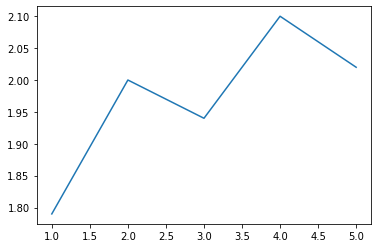

In [14]:
import matplotlib.pyplot as plt
import re


def read_score(filename):
    with open(filename) as f:
        x = f.readlines()[1]
        x = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', x)
        return float(x.group())

xs = range(1, 6)
ys = [read_score(f'95_beam{x}.score') for x in xs]
plt.plot(xs, ys)
plt.show()

# 96

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

%tensorboard --logdir log96

<IPython.core.display.Javascript object>